# Movie Recommendation System - Neural Collaborative Filtering

# Model

## Architecture

In [ ]:
# Hyperparameters
embedding_dim = 64
mlp_hidden_units = [128, 64, 32]

# Input layers
user_input_layer = Input(shape=(1,), name='user_input')
movie_input_layer = Input(shape=(1,), name='movie_input')
movie_metadata_input = Input(shape=(movie_features.shape[1],), name='movie_metadata_input')

# Embedding layers for GMF
user_embedding_gmf = Embedding(input_dim=df_final['user_encoded'].nunique(), output_dim=embedding_dim)(user_input_layer)
movie_embedding_gmf = Embedding(input_dim=df_final['movie_encoded'].nunique(), output_dim=embedding_dim)(movie_input_layer)

# Embedding layers for MLP
user_embedding_mlp = Embedding(input_dim=df_final['user_encoded'].nunique(), output_dim=embedding_dim)(user_input_layer)
movie_embedding_mlp = Embedding(input_dim=df_final['movie_encoded'].nunique(), output_dim=embedding_dim)(movie_input_layer)

# Flatten embeddings
user_vec_gmf = Flatten()(user_embedding_gmf)
movie_vec_gmf = Flatten()(movie_embedding_gmf)
user_vec_mlp = Flatten()(user_embedding_mlp)
movie_vec_mlp = Flatten()(movie_embedding_mlp)

# GMF branch (element-wise product)
gmf_output = Multiply()([user_vec_gmf, movie_vec_gmf])

# MLP branch (concatenate embeddings + movie metadata)
mlp_input = Concatenate()([user_vec_mlp, movie_vec_mlp, movie_metadata_input])

# MLP hidden layers
mlp_output = mlp_input
for units in mlp_hidden_units:
    mlp_output = Dense(units, activation='relu')(mlp_output)

# NeuMF (combine GMF and MLP branches)
ncf_output = Concatenate()([gmf_output, mlp_output])

# Final output layer with sigmoid activation (rating prediction between 0 and 1)
final_output = Dense(1, activation='sigmoid', name='prediction')(ncf_output)

# Define the model
ncf_model = Model(inputs=[user_input_layer, movie_input_layer, movie_metadata_input], outputs=final_output)

# Compile the model
ncf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Model summary
ncf_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 64)     │ 10,402,624 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 64)     │  3,779,008 │ movie_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64)        │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 64)        │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_metadata_inp… │ (None, 0)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ movie_metadata_i… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 64)     │ 10,402,624 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 64)     │  3,779,008 │ movie_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     16,512 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 64)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 64)        │          0 │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 96)        │          0 │ multiply[0][0],   │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction (Dense)  │ (None, 1)         │         97 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,390,209 (108.30 MB)

 Trainable params: 28,390,209 (108.30 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [ ]:
from google.colab import drive

# === Mount Google Drive === #
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# === File paths === #
drive_weights_file = '/content/drive/MyDrive/ncf.weights_backup.h5'
drive_epoch_file = '/content/drive/MyDrive/last_epoch_backup.txt'
local_weights_file = 'ncf.weights.h5'
local_epoch_file = 'last_epoch.txt'

# === Step 1: Load weights and determine initial epoch from Drive === #
if os.path.exists(drive_weights_file):
    print("Resuming training from weights in Drive...")
    shutil.copy(drive_weights_file, local_weights_file)
    ncf_model.load_weights(local_weights_file)

    if os.path.exists(drive_epoch_file):
        shutil.copy(drive_epoch_file, local_epoch_file)
        with open(local_epoch_file, 'r') as f:
            initial_epoch = int(f.read().strip())
        print(f"Resuming from epoch {initial_epoch + 1}...")
    else:
        initial_epoch = 0
        print("Epoch file not found in Drive, starting from epoch 1...")
else:
    print("Starting fresh training with random weights...")
    initial_epoch = 0

# === Step 2: Set batch size === #
batch_size = 1024  # Try 2048 if GPU memory allows

# === Step 3: Prepare tf.data.Dataset === #
train_dataset = tf.data.Dataset.from_tensor_slices((
    (user_input, movie_input, movie_features),
    ratings
)).shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    (
        val_data['user_encoded'].values,
        val_data['movie_encoded'].values,
        val_data.drop(columns=['user_encoded', 'movie_encoded', 'rating_normalized']).values
    ),
    val_data['rating_normalized'].values
)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# === Step 4: Callbacks === #

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Reduce LR on plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# Save local weights
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=local_weights_file,
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    verbose=1
)

# Save to Drive every epoch + log epoch time
class EpochTracker(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start_time
        self.epoch_times.append(epoch_time)

        # Save current epoch
        with open(local_epoch_file, 'w') as f:
            f.write(str(epoch + 1))

        # Backup to Drive
        shutil.copy(local_weights_file, drive_weights_file)
        shutil.copy(local_epoch_file, drive_epoch_file)
        print(f"[Drive Backup] Epoch {epoch + 1} files saved to Google Drive.")

# === Step 5: Train the model === #
epoch_tracker = EpochTracker()

history = ncf_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    initial_epoch=initial_epoch,
    callbacks=[early_stopping, reduce_lr, model_checkpoint, epoch_tracker]
)

Starting fresh training with random weights...
Epoch 1/100
15626/15626 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - mae: 0.1502
Epoch 1: saving model to ncf.weights.h5
[Drive Backup] Epoch 1 files saved to Google Drive.
15626/15626 ━━━━━━━━━━━━━━━━━━━━ 165s 10ms/step - loss: 0.0386 - mae: 0.1502 - val_loss: 0.0316 - val_mae: 0.1351 - learning_rate: 0.0010
Epoch 2/100
15625/15626 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0289 - mae: 0.1285
Epoch 2: saving model to ncf.weights.h5
[Drive Backup] Epoch 2 files saved to Google Drive.
15626/15626 ━━━━━━━━━━━━━━━━━━━━ 197s 10ms/step - loss: 0.0289 - mae: 0.1285 - val_loss: 0.0318 - val_mae: 0.1355 - learning_rate: 0.0010
Epoch 3/100
15621/15626 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 - mae: 0.1125
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: saving model to ncf.weights.h5
[Drive Backup] Epoch 3 files saved to Google Drive.
15626/15626 ━━━━━━━━━━━━━━━━━━━━ 159s 10ms/step - loss: 0.0225 - m

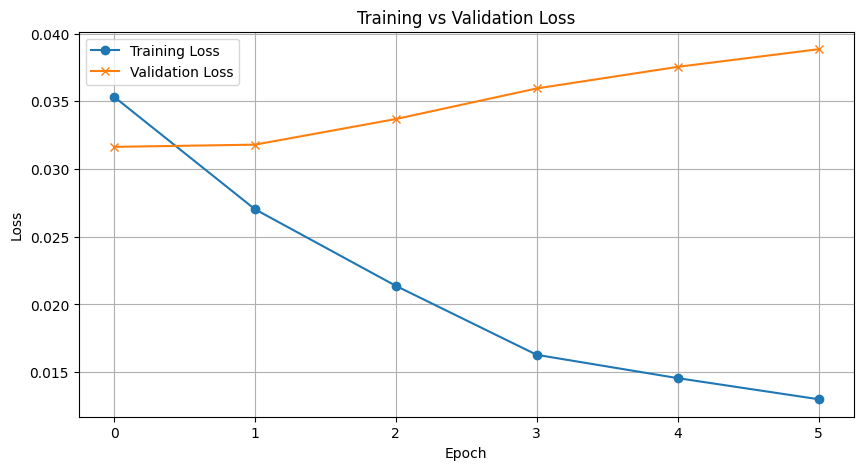

In [ ]:
# === Step 6: Plotting losses === #
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save Model configs

In [ ]:
# Save the model after training
ncf_model.save('ncf_model.h5')

# Save the movie embedding (GMF part)
movie_embedding_gmf = ncf_model.get_layer('embedding_1').get_weights()[0]  # Get the trained embedding weights
np.save('movie_embedding_gmf.npy', movie_embedding_gmf)

## Exporting Movies Ref

In [ ]:
df_movies['movie_encoded'] = df_movies['movieId'].astype('category').cat.codes
df_movies.to_csv('movies.csv', index=False)

## Save to Drive

In [ ]:
shutil.copy('movie_embedding_gmf.npy', '/content/drive/MyDrive/movie_embedding_gmf_backup.npy')
shutil.copy('movies.csv', '/content/drive/MyDrive/movies_backup.csv')
shutil.copy('ncf_model.h5', '/content/drive/MyDrive/ncf_model_backup.h5')

'/content/drive/MyDrive/ncf_model_backup.h5'